In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [4]:
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', names=['Data'])
df.head()

,Data
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [5]:
columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df[columns] = df['Data'].str.split(expand= True)
df.drop(['Data'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [6]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


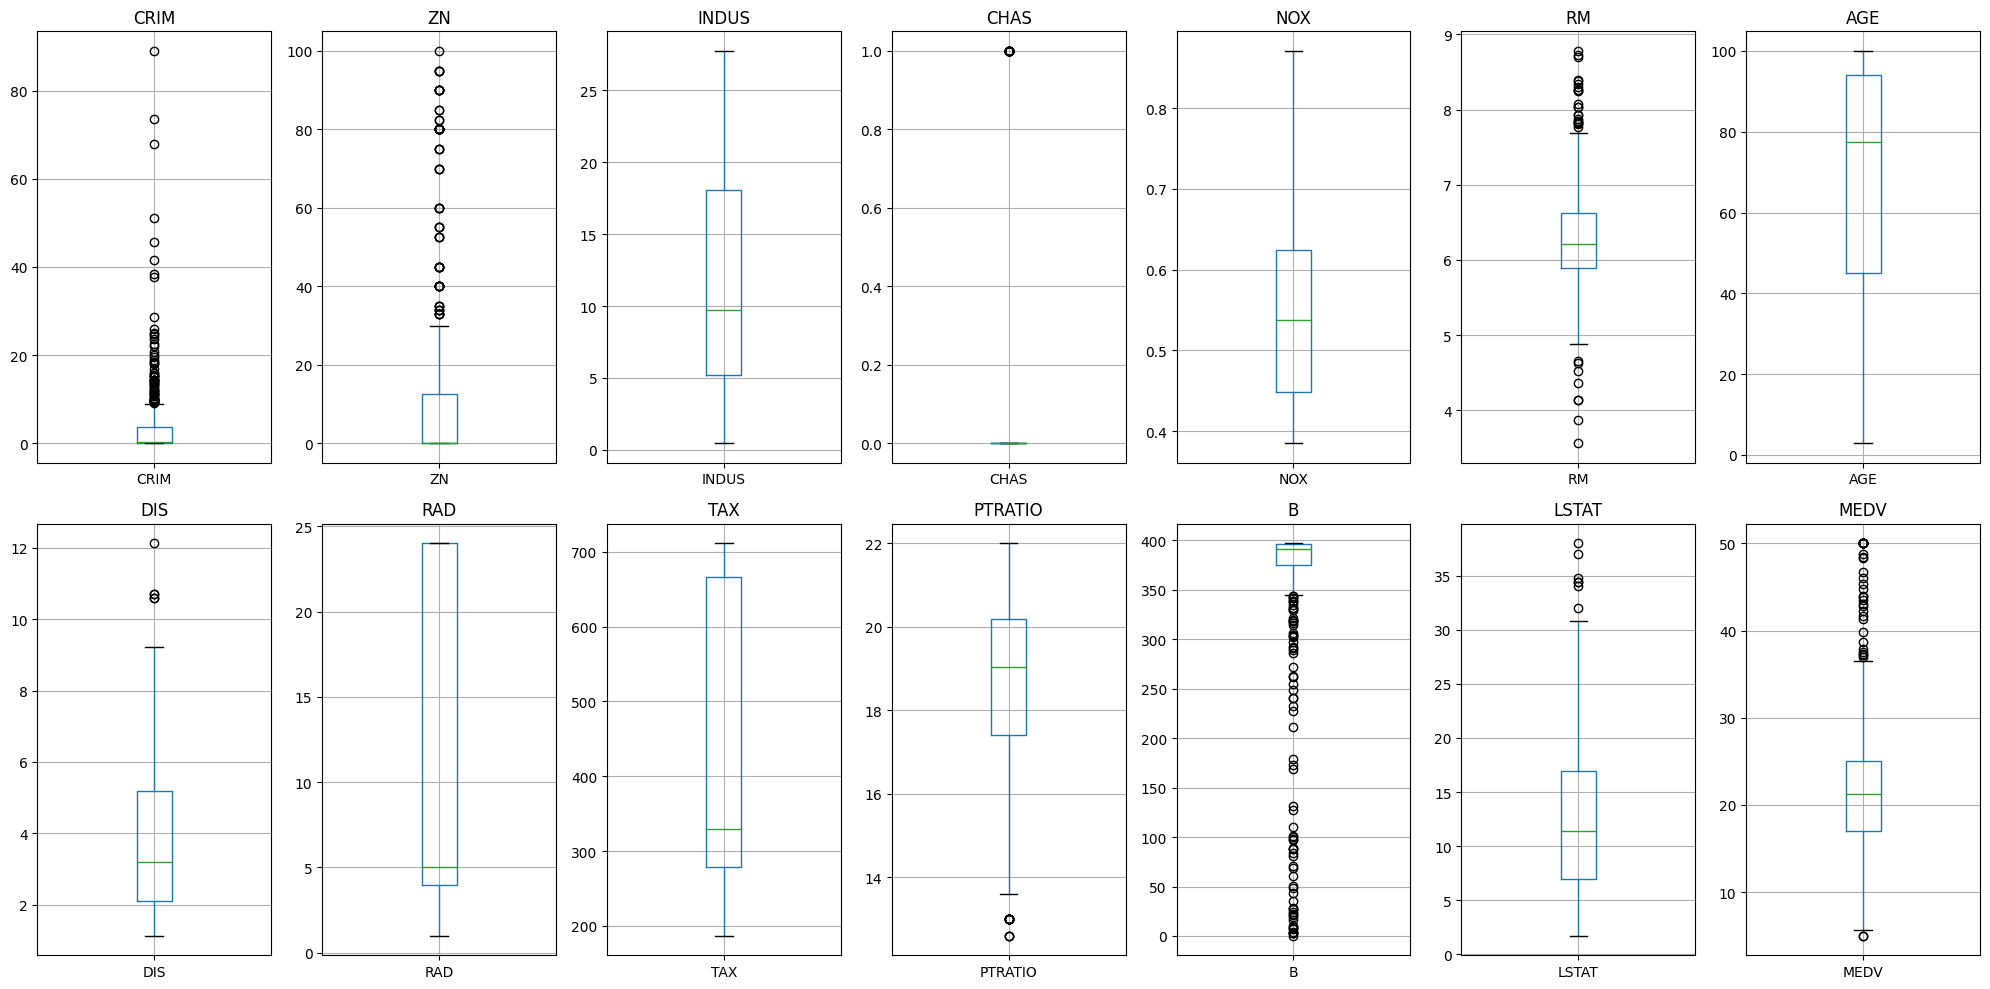

In [8]:
fig , axs = plt.subplots(ncols=7, nrows=2, figsize= (20,10))
idx = 0
axs = axs.flatten()
for column in df.columns.tolist():
    df.boxplot(column= column, ax= axs[idx])
    axs[idx].set_title(f'{column}')
    idx += 1

plt.tight_layout()
plt.show()

In [9]:
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5 * iqr)]
    prec = np.shape(v_col)[0] * 100 / np.shape(v)[0]
    print(f'column {k} outliers = {round(prec,2)}%')

column CRIM outliers = 13.04%
column ZN outliers = 13.44%
column INDUS outliers = 0.0%
column CHAS outliers = 100.0%
column NOX outliers = 0.0%
column RM outliers = 5.93%
column AGE outliers = 0.0%
column DIS outliers = 0.99%
column RAD outliers = 0.0%
column TAX outliers = 0.0%
column PTRATIO outliers = 2.96%
column B outliers = 15.22%
column LSTAT outliers = 1.38%
column MEDV outliers = 7.91%


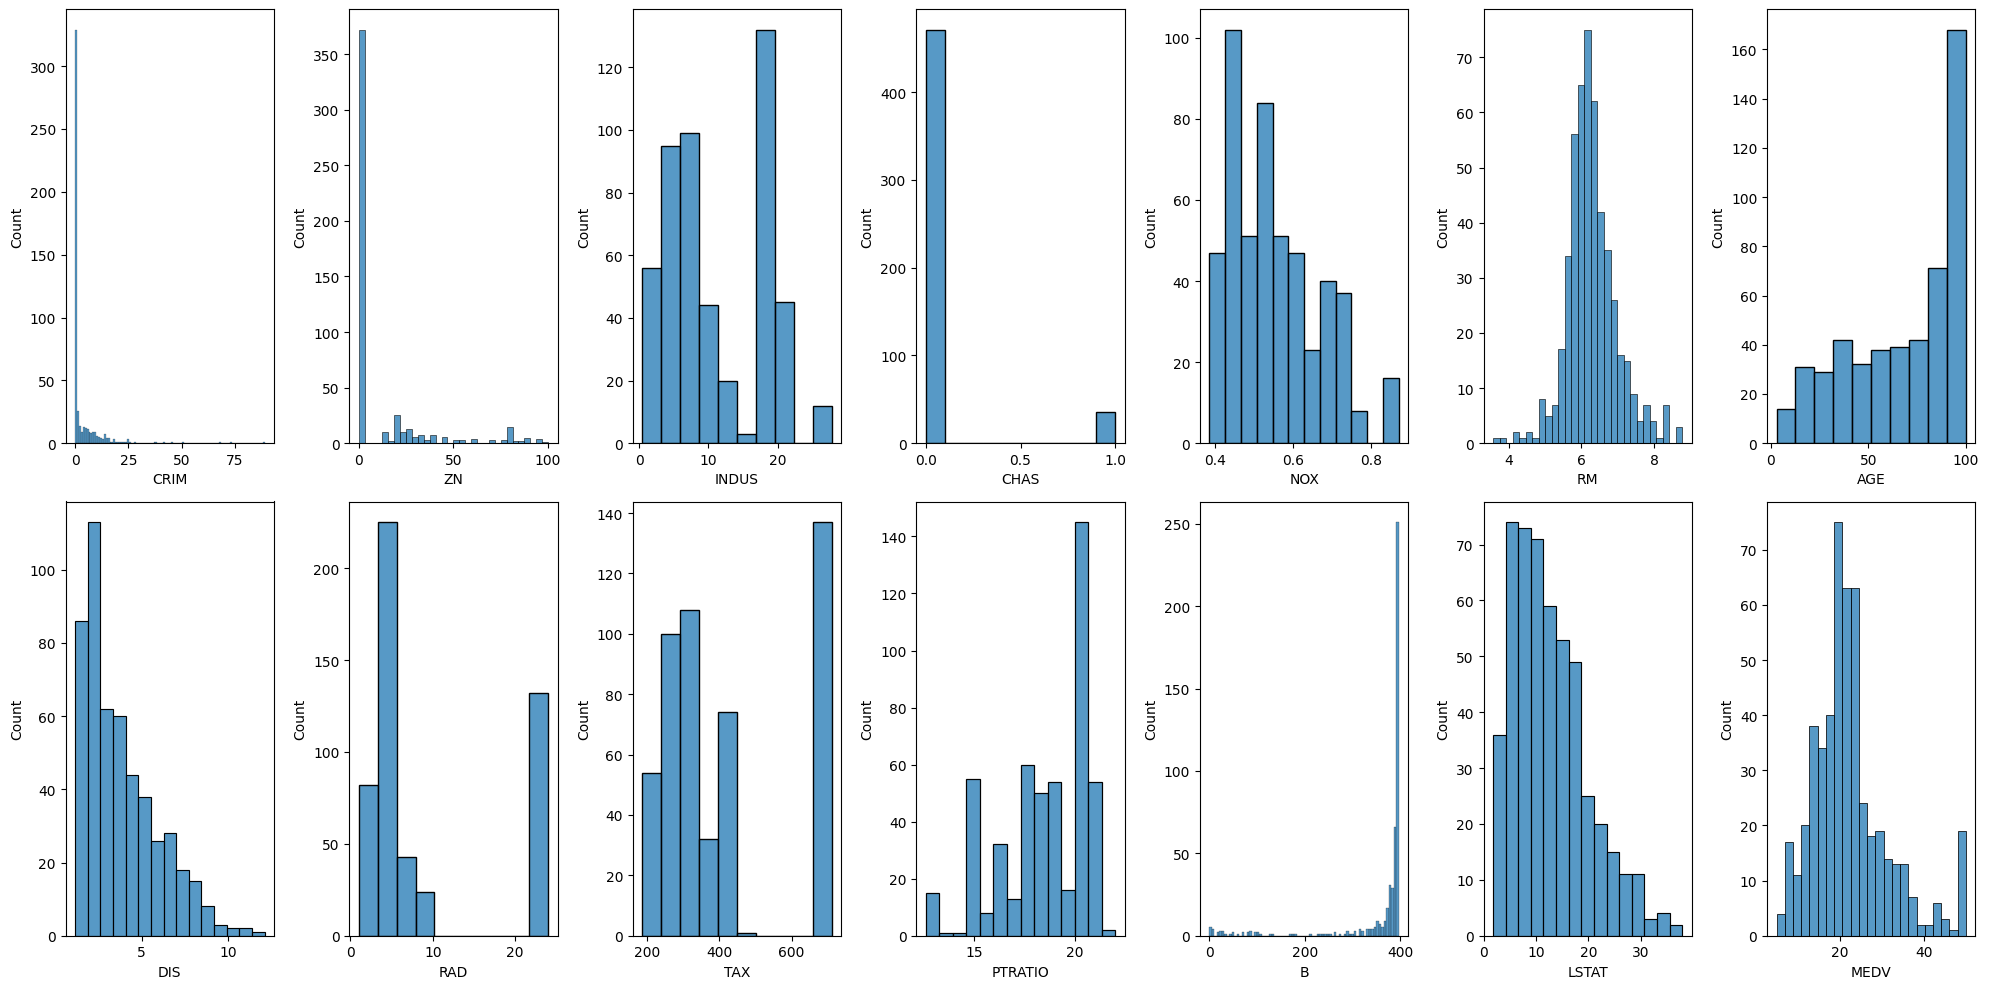

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
axs = axs.flatten()
idx = 0
for k,v in df.items():
    sns.histplot(v, ax=axs[idx])
    idx+=1
plt.tight_layout()

<Axes: >

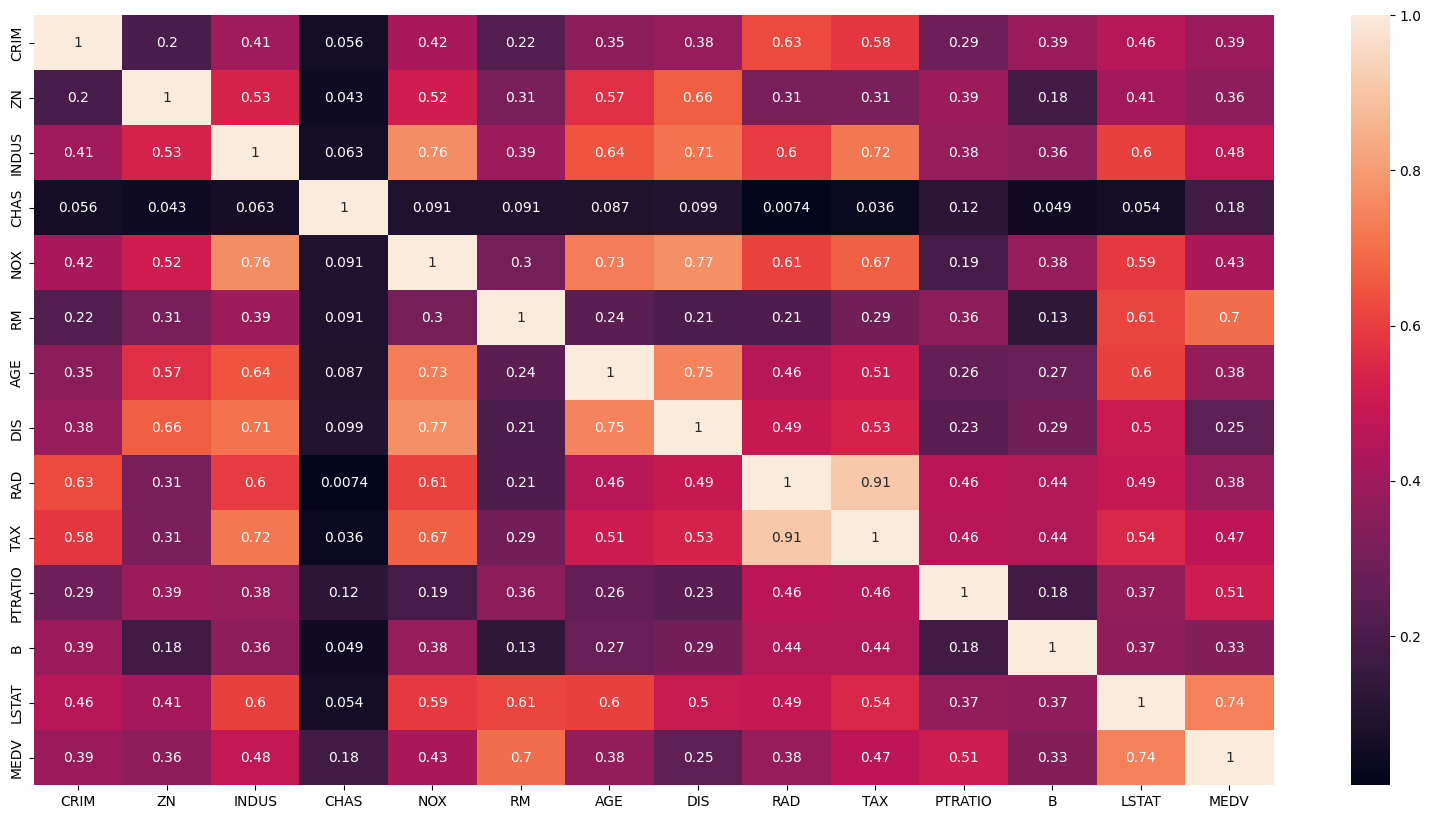

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

In [12]:
# Drop Rad as it is highly correlated with TEX
df.drop(['RAD'],axis = 1, inplace=True)
df.shape

(506, 13)

In [13]:
# Features highly correlated with MEDV
df_corr = df.corr()
high_corr_with_MEDV = df_corr[df_corr['MEDV'].abs() >= 0.4].index.tolist()
high_corr_with_MEDV.remove('MEDV')
print(high_corr_with_MEDV)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


In [14]:
# training with these columsn ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
df_final = df[high_corr_with_MEDV]
df_Y = df['MEDV']

In [16]:
# function for input data preparation
def Data_prep(df_X, df_Y, test_size = 0.2, val_size = 0.1):
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=test_size, random_state=42)
    print(f'train shape {X_train.shape}\ttest shape {X_test.shape}\tY_train shape {Y_train.shape}\tY_test shape {Y_test.shape}')
    
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=val_size, random_state=42)
    
    scaler = MinMaxScaler()

    X_train_nomalized = scaler.fit_transform(X_train)
    Y_train_normalized = (Y_train - np.mean(Y_train)) / np.std(Y_train)
    
    X_val_nomalized = scaler.fit_transform(X_val)
    Y_val_normalized = (Y_val - np.mean(Y_val)) / np.std(Y_val)

    X_test_normalized = scaler.transform(X_test)
    Y_test_normalized = (Y_test - np.mean(Y_test)) / np.std(Y_test)
    
    return X_train_nomalized, Y_train_normalized, X_val_nomalized, Y_val_normalized, X_test_normalized, Y_test_normalized

In [19]:
def model_config_train(hidden1, hidden2, x_train, y_train, x_val, y_val, epochs=50, dropout=0.4):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(None, x_train.shape[1])),
        tf.keras.layers.Dense(hidden1 , activation='relu'),
        tf.keras.layers.Dense(hidden2 , activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(1 , activation='linear')
    ])
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate= 0.01,
        decay_steps = 1000,
        decay_rate=0.9
    )
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(optimizer = opt, loss= 'mean_squared_error', metrics=['mse'])
    model.summary()
    history = model.fit(x_train, y_train, validation_data=[x_val, y_val], epochs= epochs)
    
    return model, history

In [20]:
# Training with only 6 dimensions ,the highly correlated with MEDV.
X_train_nomalized, Y_train_normalized, X_val_nomalized, Y_val_normalized, X_test_normalized, Y_test_normalized = Data_prep(df_final, df_Y)
model1, history1 = model_config_train(16, 32, X_train_nomalized, Y_train_normalized, X_val_nomalized, Y_val_normalized)
model1.evaluate(X_test_normalized, Y_test_normalized, verbose= 1)

train shape (404, 6)	test shape (102, 6)	Y_train shape (404,)	Y_test shape (102,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 16)          112       
                                                                 
 dense_1 (Dense)             (None, None, 32)          544       
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 1s 27ms/step - loss: 0.8179 - mse: 0.8179 - val_loss: 0.

[0.26237165927886963, 0.26237165927886963]

In [21]:
# Training using all dimensions of data
X_train_nomalized, Y_train_normalized, X_val_nomalized, Y_val_normalized, X_test_normalized, Y_test_normalized = Data_prep(df, df_Y)
model, history = model_config_train(16, 32, X_train_nomalized, Y_train_normalized, X_val_nomalized, Y_val_normalized)
model.evaluate(X_test_normalized, Y_test_normalized, verbose= 1)

train shape (404, 13)	test shape (102, 13)	Y_train shape (404,)	Y_test shape (102,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 16)          224       
                                                                 
 dense_4 (Dense)             (None, None, 32)          544       
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 dense_5 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 0.9149 - mse: 0.9149 - val_loss

[0.044946614652872086, 0.044946614652872086]

In [24]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    # Plot training loss
    plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='D')

    # Plot validation loss
    plt.plot(epochs, val_loss, label='Validation Loss', color='red', marker='o')

    # Add labels and a legend
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Show the plot
    plt.show()

MODEL WITH ALL DIMENSIONS


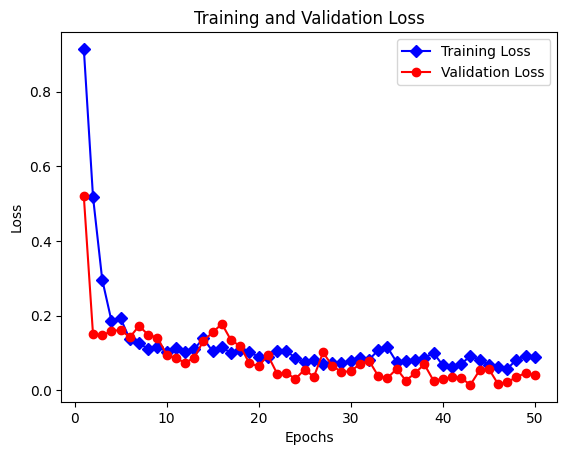

MODEL WITH 6 DIMENSIONS


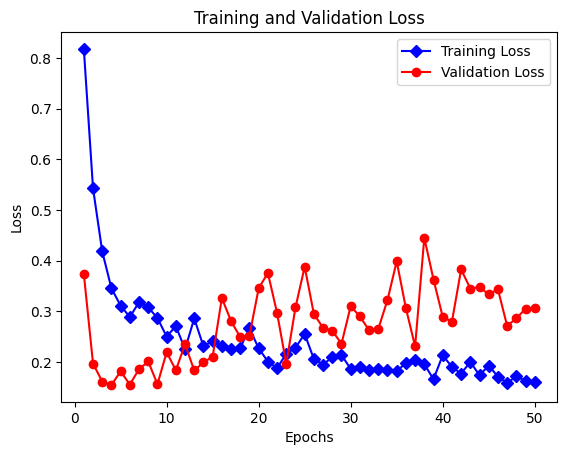

In [25]:
print('MODEL WITH ALL DIMENSIONS')
plot_loss(history)
print('MODEL WITH 6 DIMENSIONS')
plot_loss(history1)